In [1]:
import matplotlib.pyplot as plt

In [2]:
num_fc= 2
data_dim_list= [2, 8, 32, 64, 128]
num_tasks_list= [1, 2, 4, 8]

res={}
for data_dim in data_dim_list:
    if data_dim not in res.keys():
        res[data_dim]= {}
    for num_tasks in num_tasks_list:
        if num_tasks not in res[data_dim].keys():            
            res[data_dim][num_tasks]= { 'rmse_y': {}, 'r2_y':{}, 'rmse_latent' : {}, 'r2_latent' :{} , 'rmse_y_ica' :{}, 'r2_y_ica':{}, 'rmse_latent_ica' :{}, 'r2_latent_ica' : {}  }
            
            f= open('../results/fc_' + str(num_fc) + '/num_tasks_' + str(num_tasks) + '_data_dim_' + str(data_dim) + '.txt', 'r')
            data= f.readlines()
        
            res[data_dim][num_tasks]['rmse_y']['mean'] = float(data[-8].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y']['std'] = float(data[-8].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_y']['mean'] = float(data[-7].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y']['std'] = float(data[-7].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_latent']['mean'] = float(data[-6].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_latent']['std'] = float(data[-6].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_latent']['mean'] = float(data[-5].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_latent']['std'] = float(data[-5].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_y_ica']['mean'] = float(data[-4].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_y_ica']['std'] = float(data[-4].split(' ')[-1].replace('\n',''))

            res[data_dim][num_tasks]['r2_y_ica']['mean'] = float(data[-3].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_y_ica']['std'] = float(data[-3].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['rmse_latent_ica']['mean'] = float(data[-2].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['rmse_latent_ica']['std'] = float(data[-2].split(' ')[-1].replace('\n',''))
            
            res[data_dim][num_tasks]['r2_latent_ica']['mean'] = float(data[-1].split(' ')[-2].replace('\n',''))
            res[data_dim][num_tasks]['r2_latent_ica']['std'] = float(data[-1].split(' ')[-1].replace('\n',''))

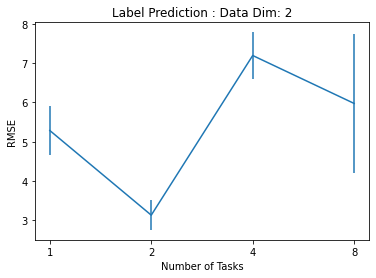

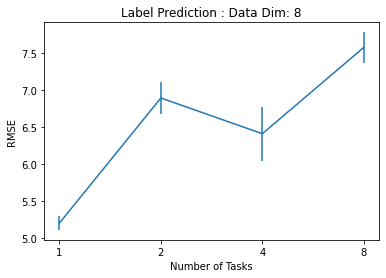

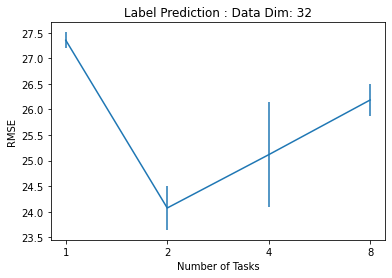

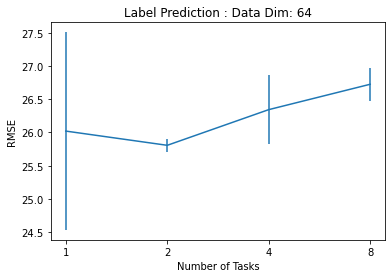

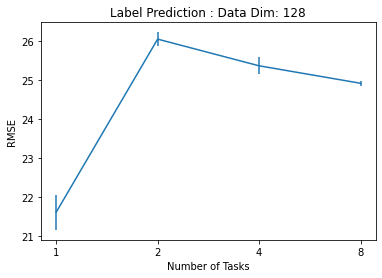

In [3]:
key= 'rmse_y'
for data_dim in data_dim_list:
    x= ['1', '2', '4', '8']
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])
    
    plt.xlabel('Number of Tasks')
    plt.ylabel('RMSE')
    plt.title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim) )
    plt.errorbar(x, out, yerr=out_err)
    plt.show()

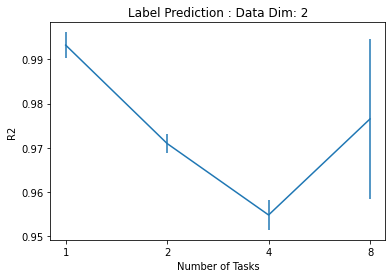

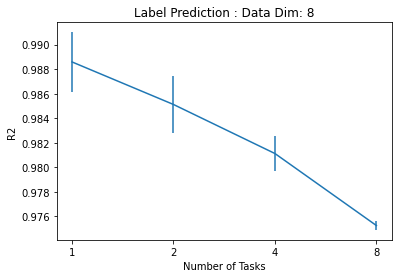

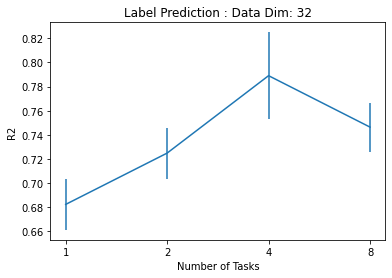

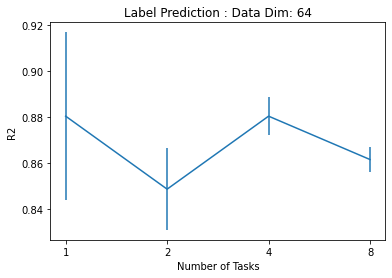

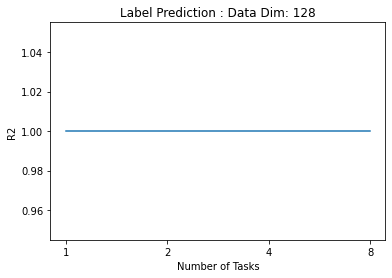

In [8]:
key= 'r2_y_ica'
for data_dim in data_dim_list:
    x= ['1', '2', '4', '8']
    out=[]
    out_err=[]
    for num_tasks in num_tasks_list:
        data= res[data_dim][num_tasks][key]
        out.append(data['mean'])
        out_err.append(data['std'])
    
    plt.xlabel('Number of Tasks')
    plt.ylabel('R2')
    plt.title('Label Prediction ' + ':' + ' Data Dim: ' + str(data_dim) )
    plt.errorbar(x, out, yerr=out_err)
    plt.show()

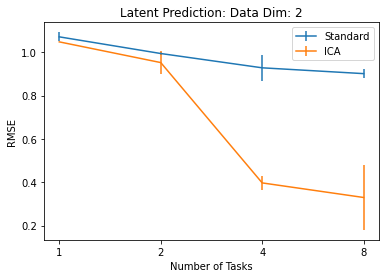

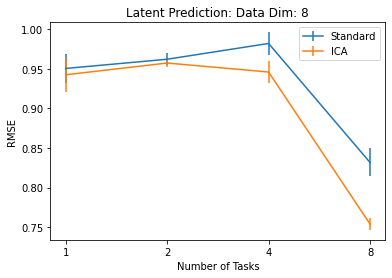

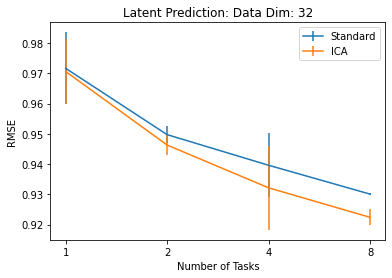

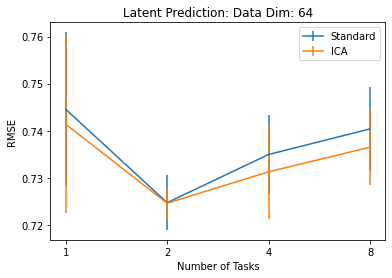

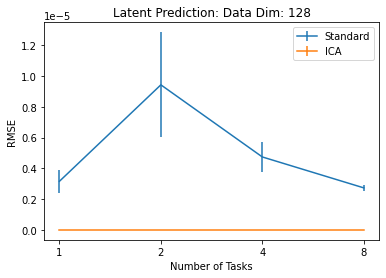

In [6]:
for data_dim in data_dim_list:
    x= ['1', '2', '4', '8']
    out=[]
    out_err=[]
    
    out_ica=[]
    out_ica_err=[]
    
    for num_tasks in num_tasks_list:
        
        data= res[data_dim][num_tasks]['rmse_latent']
        out.append(data['mean'])
        out_err.append(data['std'])
        
        data= res[data_dim][num_tasks]['rmse_latent_ica']
        out_ica.append(data['mean'])
        out_ica_err.append(data['std'])
        
    
    plt.xlabel('Number of Tasks')
    plt.ylabel('RMSE')
    plt.title('Latent Prediction' + ':' + ' Data Dim: ' + str(data_dim) )
    plt.errorbar(x, out, yerr=out_err, label='Standard')
    plt.errorbar(x, out_ica, yerr=out_ica_err, label='ICA')
    plt.legend()
    plt.show()

# R2 Score

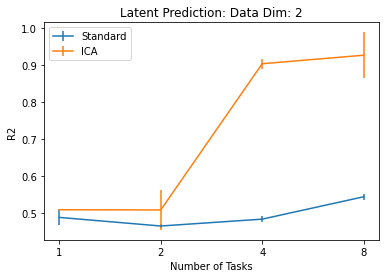

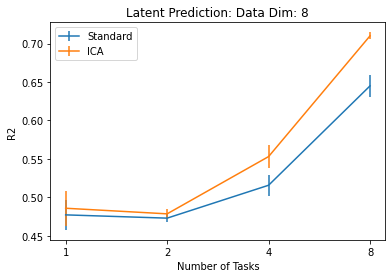

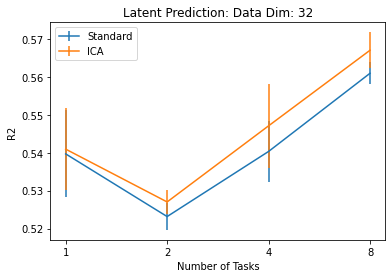

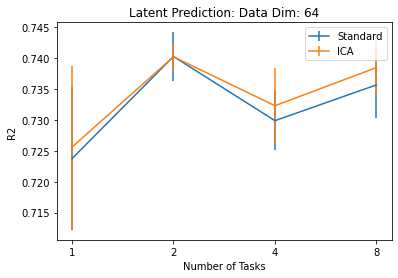

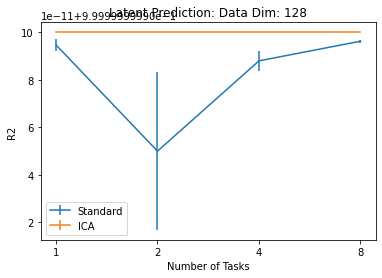

In [7]:
for data_dim in data_dim_list:
    x= ['1', '2', '4', '8']
    out=[]
    out_err=[]
    
    out_ica=[]
    out_ica_err=[]
    
    for num_tasks in num_tasks_list:
        
        data= res[data_dim][num_tasks]['r2_latent']
        out.append(data['mean'])
        out_err.append(data['std'])
        
        data= res[data_dim][num_tasks]['r2_latent_ica']
        out_ica.append(data['mean'])
        out_ica_err.append(data['std'])
        
    
    plt.xlabel('Number of Tasks')
    plt.ylabel('R2')
    plt.title('Latent Prediction' + ':' + ' Data Dim: ' + str(data_dim) )
    plt.errorbar(x, out, yerr=out_err, label='Standard')
    plt.errorbar(x, out_ica, yerr=out_ica_err, label='ICA')
    plt.legend()
    plt.show()

## Data/Latent Dim: 4

In [ ]:
## Some training issues with num_task= 8

x= ['1', '2', '4']
latent_rmse= [0.67, 0.61, 0.02]
latent_std= [0.03, 0.04,  0.01]

ica_latent_rmse= [0.08, 0.09, 0.04]
ica_latent_std= [3.06e-7, 1.48e-6, 2.89e-9]

plt.xlabel('Number of Tasks')
plt.ylabel('RMSE')
plt.title('Linear Regression between z and z_pred')
plt.errorbar(x, latent_rmse, yerr=latent_std)
plt.errorbar(x, ica_latent_rmse, yerr=ica_latent_std)

## Non Linear Regression

## Data/Latent Dim: 2

In [ ]:
x= ['1', '2', '4', '8']
latent_rmse= [1.02, 1.38, 0.93, 1.02]
latent_std= [0.04, 0.02, 0.01, 0.01]

ica_latent_rmse= [0.54, 0.42, 0.14, 0.21]
ica_latent_std= [0.32, 6.86e-5, 1.71e-7, 0.01]

plt.xlabel('Number of Tasks')
plt.ylabel('RMSE')
plt.title('Linear Regression between z and z_pred')
plt.errorbar(x, latent_rmse, yerr=latent_std)
plt.errorbar(x, ica_latent_rmse, yerr=ica_latent_std)

## Data/Latent Dim: 32

In [ ]:
x= ['1', '2', '4', '8']
latent_rmse= [0.84, 1.38, 0.93, 1.02]
latent_std= [0.004, 0.02, 0.01, 0.01]

ica_latent_rmse= [0.83, 0.42, 0.14, 0.21]
ica_latent_std= [0.003, 6.86e-5, 1.71e-7, 0.01]

plt.xlabel('Number of Tasks')
plt.ylabel('RMSE')
plt.title('Linear Regression between z and z_pred')
plt.errorbar(x, latent_rmse, yerr=latent_std)
plt.errorbar(x, ica_latent_rmse, yerr=ica_latent_std)

In [ ]:
1.04366698e+04 1.04186314e+02 8.79685741e+01 8.20723140e+01
 7.52930629e+01 5.87194356e+01 5.81742961e+01 5.30747353e+01
5.04834089e+01 4.55760597e+01 4.07156940e+01 3.63783336e+01
 3.57105750e+01 2.86155213e+01 2.54873824e+01 2.28848769e+01
 2.07370788e+01 1.72204083e+01 1.66745847e+01 1.57875972e+01
 1.22432704e+01 1.09227974e+01 8.80327074e+00 7.30841714e+00
 5.31479138e+00 4.45586153e+00 3.77465450e+00 3.09193469e+00
 2.62206708e+00 2.09822457e+00 1.83696325e+00 1.62528028e+00]
Data Dimensions:  (1000, 32) (1000, 32) (1000, 1)
0.44957726173908674 41.279796108250096
[9.76350593e+02 1.25955236e+01 9.34649369e+00 8.60370182e+00
 7.63235680e+00 6.75429398e+00 6.28044539e+00 5.33758658e+00
 4.89790130e+00 3.96897384e+00 3.75553646e+00 3.07788739e+00
 2.91759946e+00 2.67029186e+00 2.19369947e+00 1.92834550e+00
 1.77834903e+00 1.54952084e+00 1.24886187e+00 1.07349016e+00
 9.54977553e-01 8.55726082e-01 6.08868786e-01 5.29682085e-01
 3.90019333e-01 3.48012409e-01 3.17317552e-01 2.53972853e-01
 2.05349201e-01 1.76082274e-01 1.29742638e-01 8.04920813e-02